## Histogram Equalization
**Histogram equalization** is a technique used in image processing to improve the contrast of an image. The goal is to redistribute the intensity values so that the histogram of the output image is approximately uniform. This helps in enhancing the visibility of details in images with poor contrast.

The steps to achieve histogram equalization are as follows:

- `Compute the histogram of the image`: Count the number of pixels for each intensity value.
- `Compute the cumulative distribution function (CDF)`: The CDF is a running sum of the histogram, which represents the cumulative frequency of pixel intensities.
- `Normalize the CDF`: To map the CDF values to a range [0, 255], corresponding to the intensity levels in a grayscale image.
- Map the original intensity values to new values using the normalized CDF.
- Replace pixel values in the image with the corresponding values from the new intensity map

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [5]:
# Function to perform histogram equalization
def histogram_equalization(image):
    # Step 1: Compute histogram of the image
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])
    
    # Step 2: Compute the cumulative distribution function (CDF)
    cdf = hist.cumsum()  # cumulative sum of the histogram
    cdf_normalized = cdf * hist.max() / cdf.max()  # Normalized CDF for plotting
    
    # Step 3: Normalize the CDF to the range [0, 255]
    cdf_min = cdf.min()
    cdf = (cdf - cdf_min) * 255 / (cdf.max() - cdf_min)
    cdf = cdf.astype('uint8')  # Ensure integer values

    # Step 4: Use the CDF to map the old pixel values to the new equalized values
    image_equalized = cdf[image]

    return image_equalized, cdf_normalized

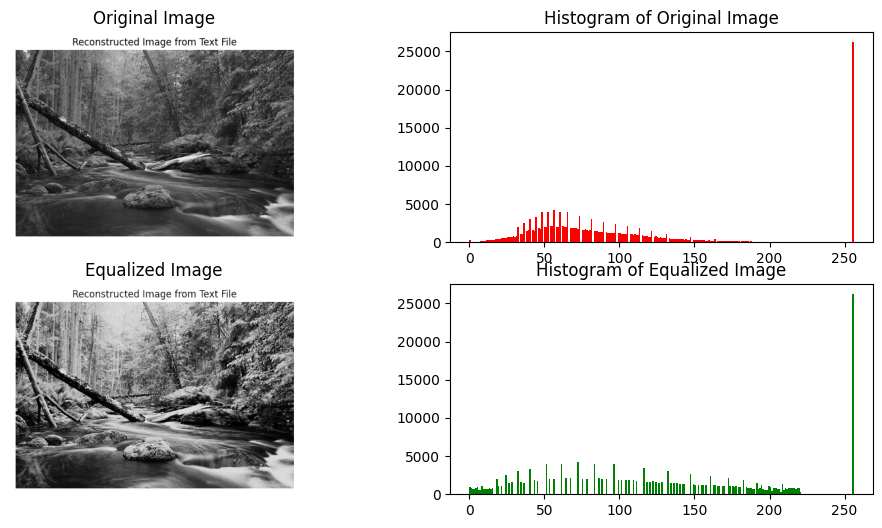

In [6]:
# Load a grayscale image
image = cv2.imread('sample.png', 0)  # 0 means grayscale

# Apply histogram equalization
image_equalized, cdf_normalized = histogram_equalization(image)

# Plotting the original and equalized images and histograms
plt.figure(figsize=(12, 6))

# Original Image and its Histogram
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.hist(image.flatten(), 256, [0, 256], color='r')
plt.title('Histogram of Original Image')

# Equalized Image and its Histogram
plt.subplot(2, 2, 3)
plt.imshow(image_equalized, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.hist(image_equalized.flatten(), 256, [0, 256], color='g')
plt.title('Histogram of Equalized Image')

plt.show()